# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
file_path = './calculated_data/15m_data_cleaned.csv'
raw_file_path = './calculated_data/15m_data_raw.csv'

# Dataset Loading and Analysis

In [3]:
df = pd.read_csv(file_path) 
df2 = pd.read_csv(raw_file_path)
df.head()


,Unnamed: 0,Station,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Checks,AQI_calculated,AQI_bucket_calculated
0,4573,Railway Colony,2019-02-17 15:15:00,46.00,80.00,1.29,9.16,12.02,27.19,13.56,0.40,15.80,7,67.0,Satisfactory
1,4574,Railway Colony,2019-02-17 15:30:00,46.00,80.00,1.74,8.93,12.48,30.29,13.71,0.41,15.52,7,68.0,Satisfactory
2,4575,Railway Colony,2019-02-17 15:45:00,45.62,79.92,1.87,8.56,12.17,28.20,13.88,0.41,15.33,7,68.0,Satisfactory
3,4576,Railway Colony,2019-02-17 16:00:00,41.00,72.92,1.83,8.72,12.37,26.69,13.77,0.40,15.30,7,68.0,Satisfactory
4,4577,Railway Colony,2019-02-17 16:15:00,41.00,79.00,1.69,7.91,11.30,26.83,13.87,0.41,15.49,7,68.0,Satisfactory


## Seasonal Trend of AQI

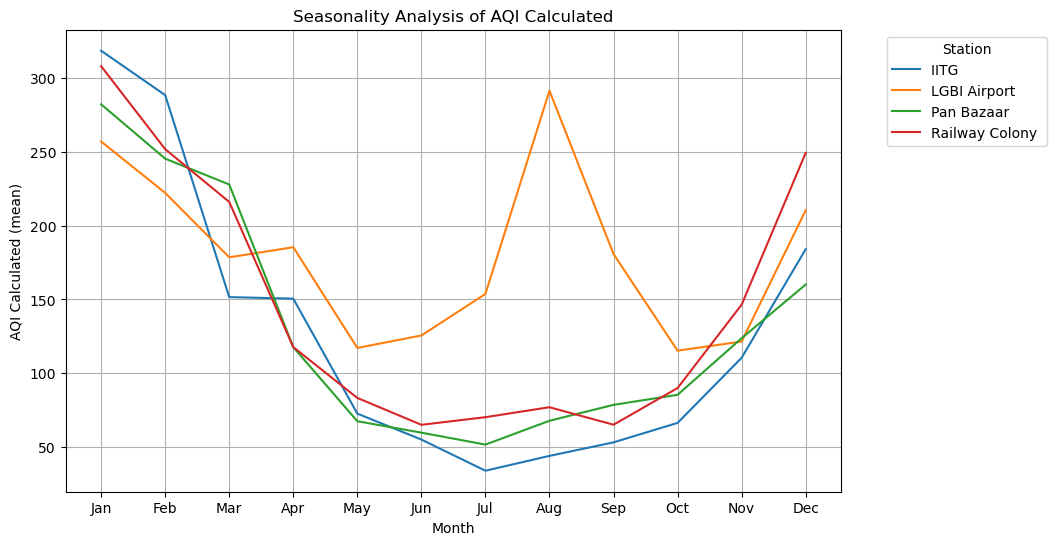

In [27]:
df_filtered = df[['Station', 'Timestamp', 'AQI_calculated']].copy()
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])
df_filtered['Month'] = df_filtered['Timestamp'].dt.month
grouped_data = df_filtered.groupby(['Station', 'Month'])

seasonality_analysis = grouped_data['AQI_calculated'].mean().unstack()

plt.figure(figsize=(10, 6))
for station in seasonality_analysis.index:
    plt.plot(seasonality_analysis.columns, seasonality_analysis.loc[station], label=station)

plt.title('Seasonality Analysis of AQI Calculated')
plt.xlabel('Month')
plt.ylabel('AQI Calculated (mean)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Analyzing Correlation among features

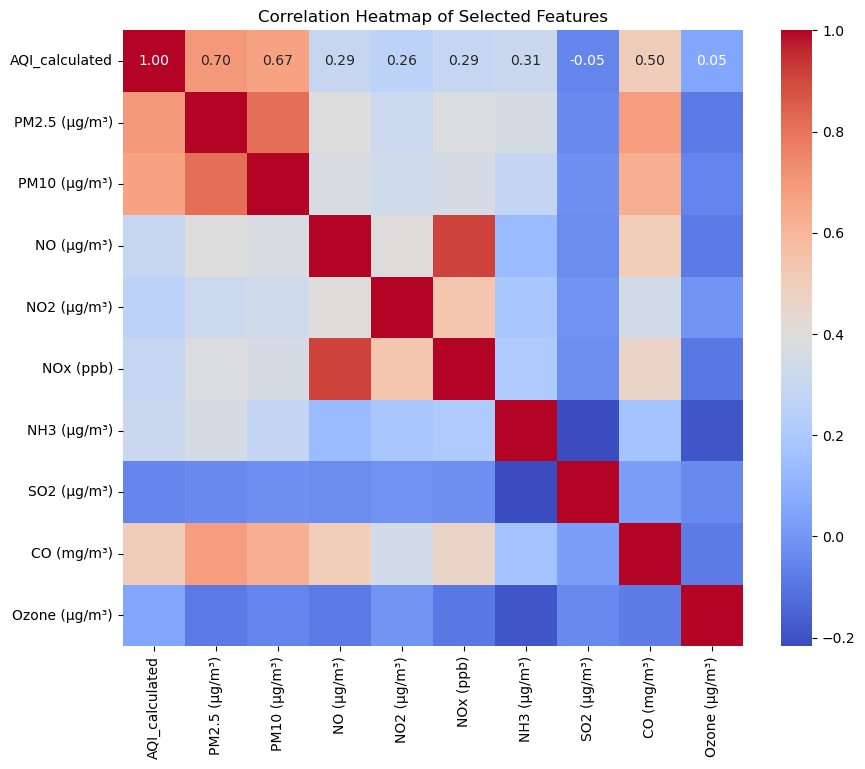

In [4]:
columns_of_interest = ['AQI_calculated', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)',
                       'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)',
                       'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
                       'Ozone (µg/m³)']
selected_data = df[columns_of_interest]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Selected Features')
plt.show()

## Scatter Plots for analysis

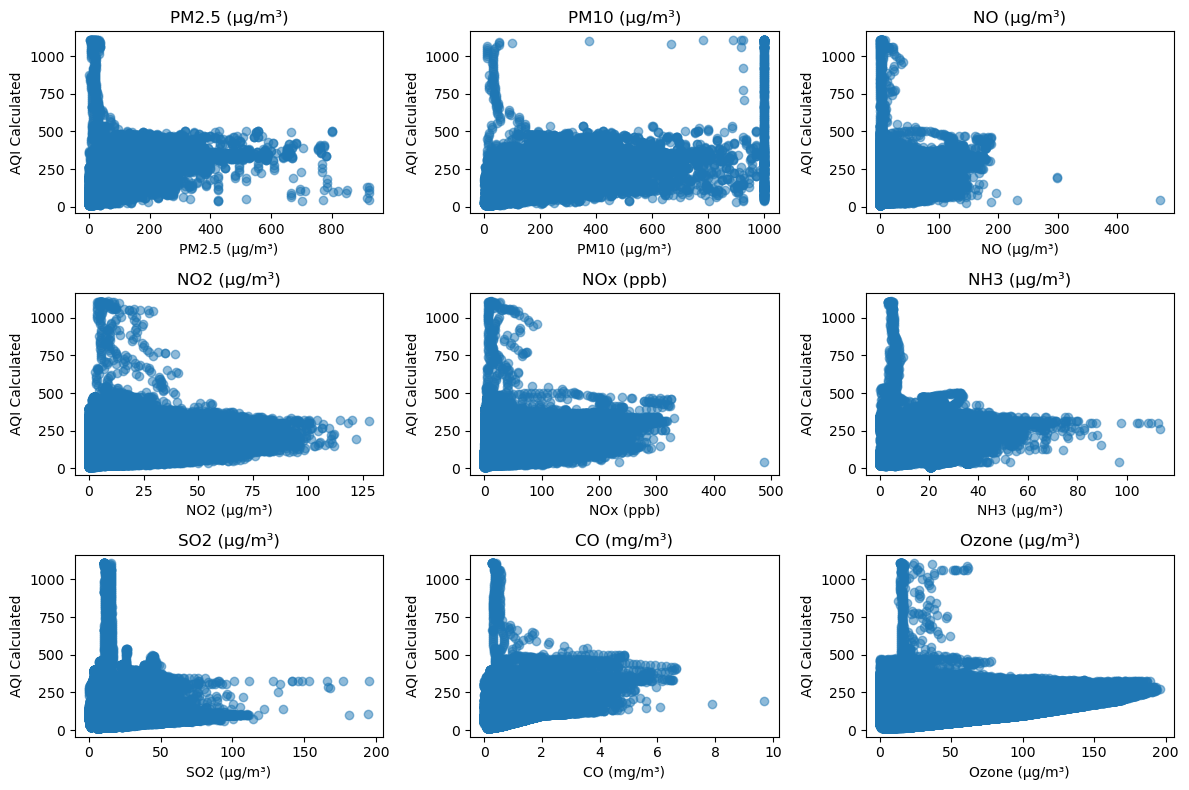

In [24]:
plt.figure(figsize=(12, 8))
for i, constituent in enumerate(columns_of_interest[1:], start=1):
    plt.subplot(3, 3, i)
    plt.scatter(df_filtered[constituent], df_filtered['AQI_calculated'], alpha=0.5)
    plt.title(constituent)
    plt.xlabel(constituent)
    plt.ylabel('AQI Calculated')

plt.tight_layout()
plt.show()

## Weekly Analysis

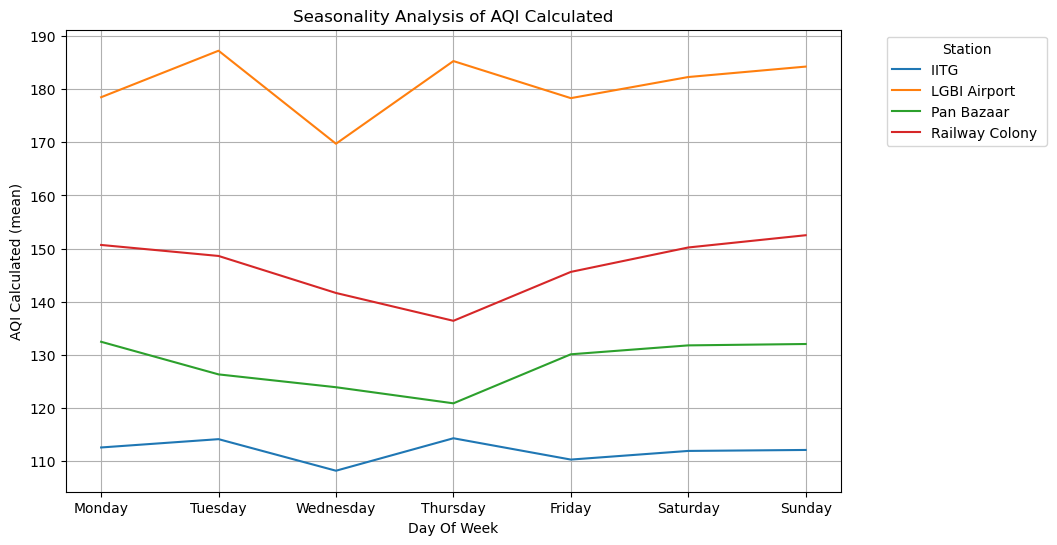

In [5]:
df_filtered = df[['Station', 'Timestamp', 'AQI_calculated']].copy()
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'])
df_filtered['DayofWeek'] = df_filtered['Timestamp'].dt.dayofweek
grouped_data = df_filtered.groupby(['Station', 'DayofWeek'])

seasonality_analysis = grouped_data['AQI_calculated'].mean().unstack()

plt.figure(figsize=(10, 6))
for station in seasonality_analysis.index:
    plt.plot(seasonality_analysis.columns, seasonality_analysis.loc[station], label=station)

plt.title('Seasonality Analysis of AQI Calculated')
plt.xlabel('Day Of Week')
plt.ylabel('AQI Calculated (mean)')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Data Availability Check

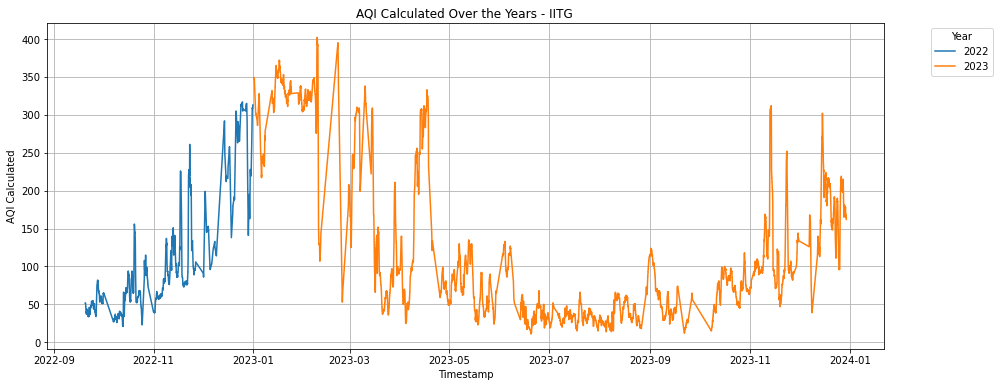

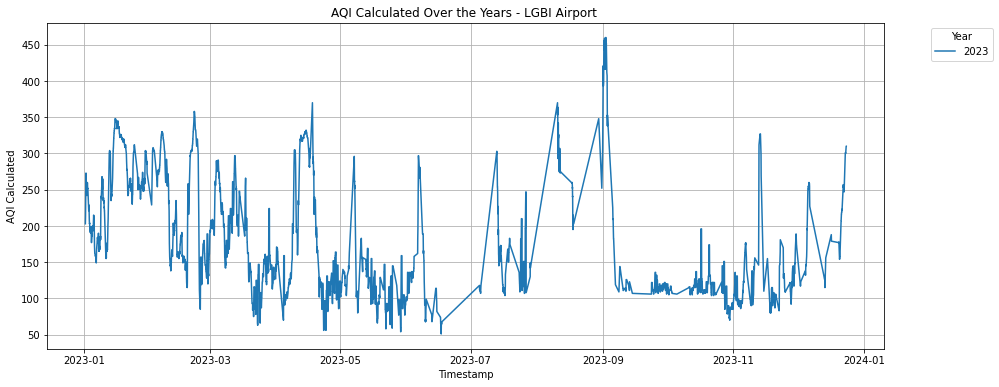

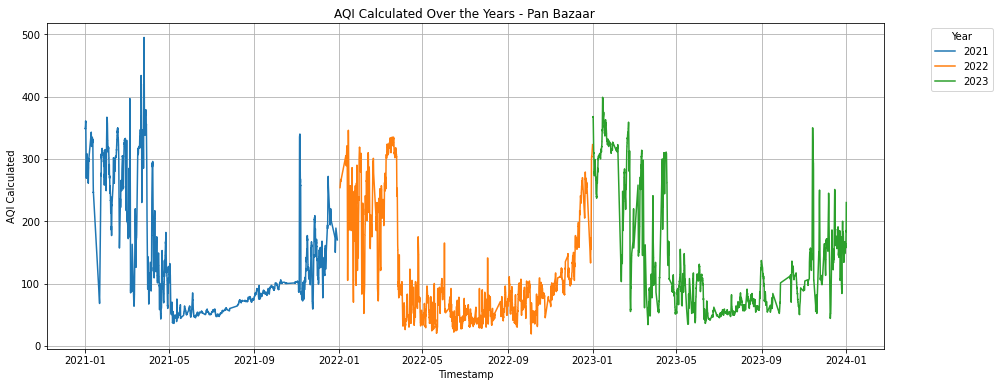

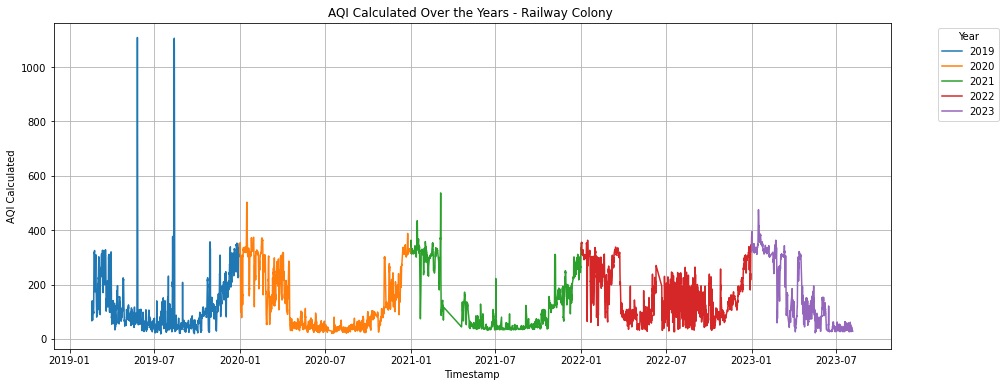

In [15]:
df_filtered = df[['Station', 'Timestamp', 'AQI_calculated']].copy()
df_filtered['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_filtered['Year'] = df_filtered['Timestamp'].dt.year

# Group the data by station
grouped_data = df_filtered.groupby(['Station'])

for station, data in grouped_data:
    plt.figure(figsize=(15, 6))
    plt.title(f'AQI Calculated Over the Years - {station}')
    plt.xlabel('Timestamp')
    plt.ylabel('AQI Calculated')
    plt.grid(True)
    
    years = data['Year'].unique()
    for year in years:
        year_data = data[data['Year'] == year]
        plt.plot(year_data['Timestamp'], year_data['AQI_calculated'], label=str(year))
    
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

<AxesSubplot:>

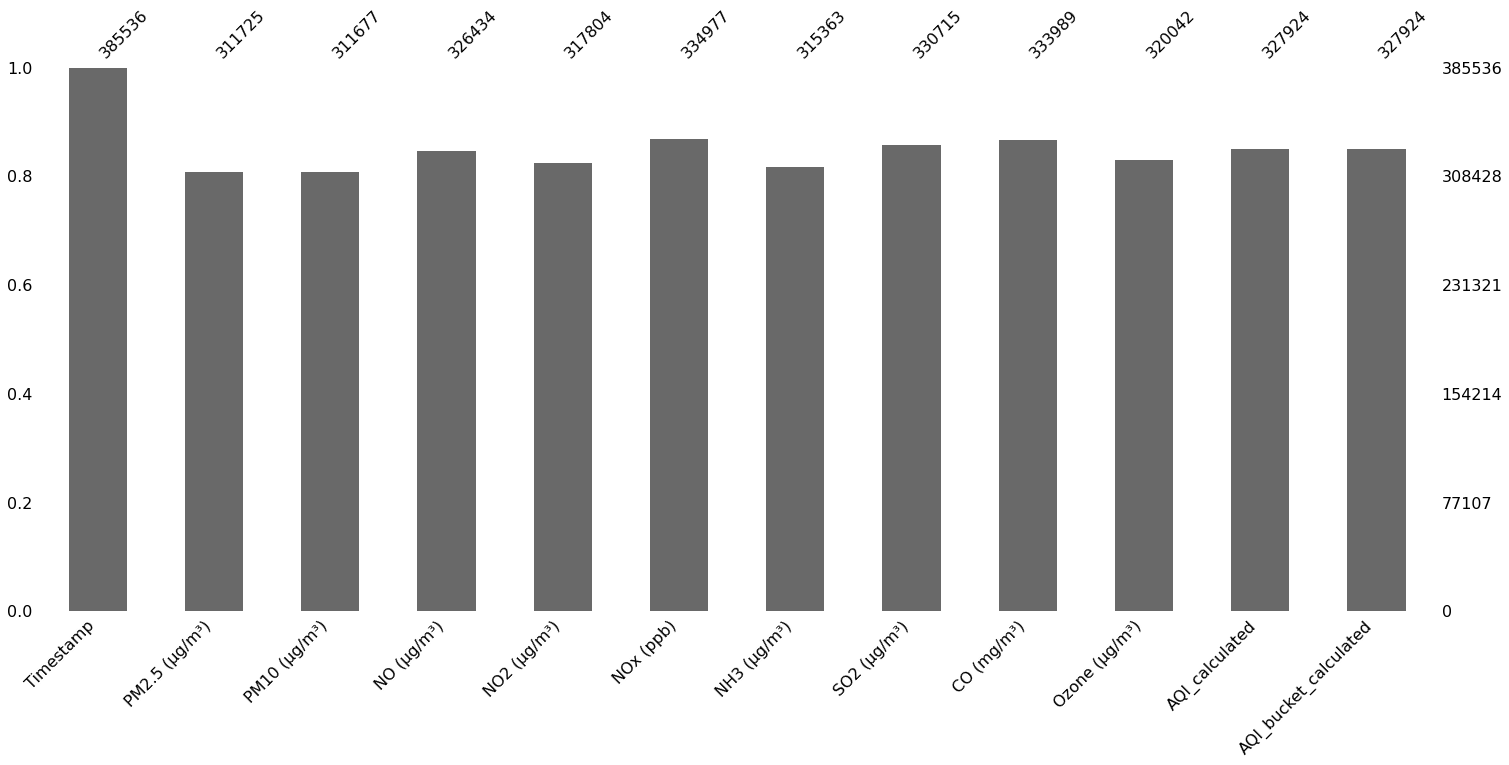

In [10]:
columns_to_keep = [col for col in df.columns if col not in ['Unnamed: 0', 'Station','Checks']]
df_filtered = df2[columns_to_keep].copy()
msno.bar(df_filtered) 

<AxesSubplot:>

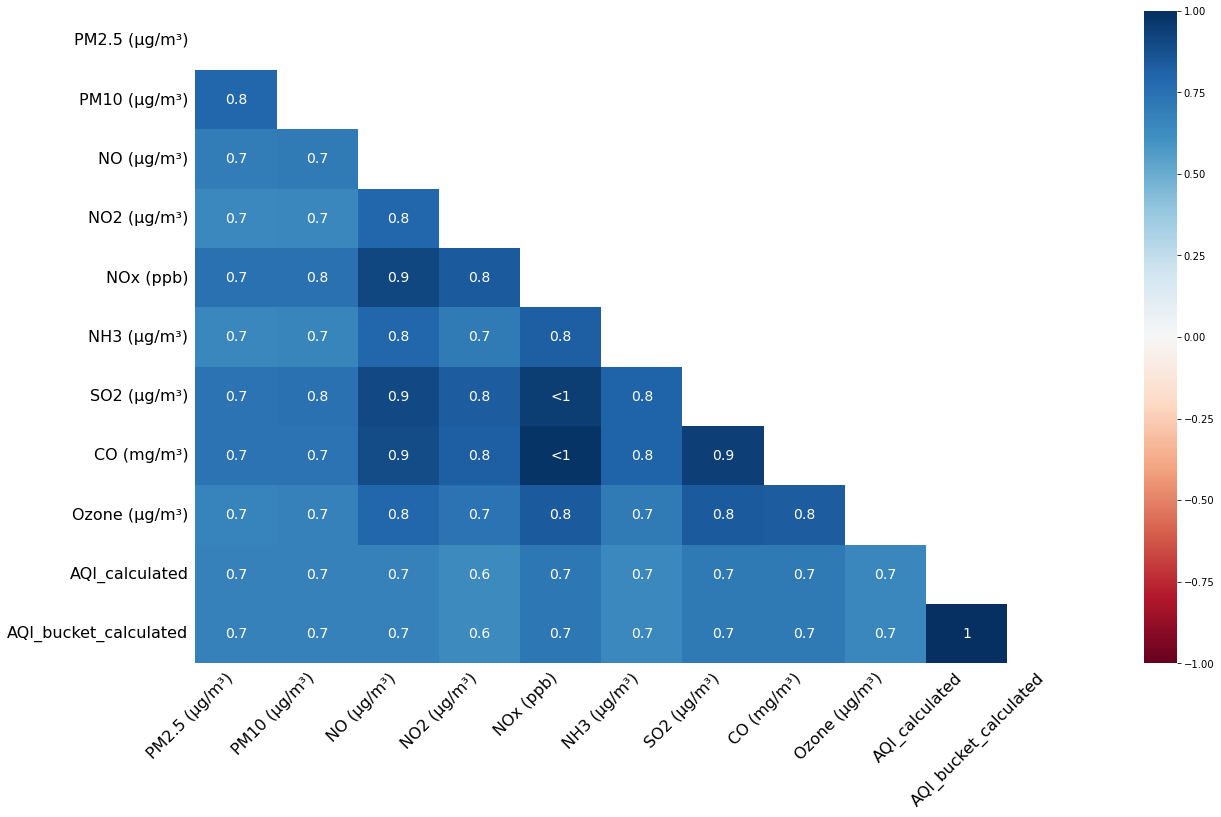

In [33]:
msno.heatmap(df_filtered) 